## decision_tree_regressor


Results for Decision Tree Regressor:
{'Model': 'Decision Tree Regressor', 'Train R2': 0.9579084247977445, 'Train RMSE': 0.15752300026914068, 'Train MSE': 0.024813495613791696, 'Train MAE': 0.09340964762512906, 'Test R2': 0.9221585938121342, 'Test RMSE': 0.21346866379243584, 'Test MSE': 0.04556887042132801, 'Test MAE': 0.12301522151401795}


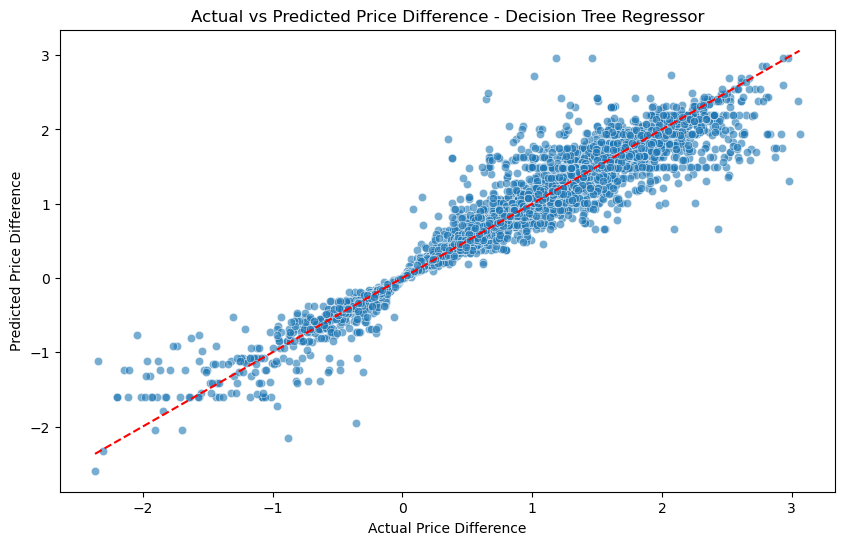

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Initialize and fit the model
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'Decision Tree Regressor',
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for Decision Tree Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - Decision Tree Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


Depth 2 - Cross-Validation R2 Scores: [0.81360816 0.81393802 0.80952818 0.81500792 0.81487648]
Depth 2 - Mean CV R2 Score: 0.8133917536031898, Std CV R2 Score: 0.002004437325717366
Depth 3 - Cross-Validation R2 Scores: [0.87998523 0.8788899  0.8779251  0.87656063 0.87575232]
Depth 3 - Mean CV R2 Score: 0.8778226368804006, Std CV R2 Score: 0.001530046689467693
Depth 4 - Cross-Validation R2 Scores: [0.89680583 0.89995102 0.89608785 0.89817596 0.89563686]
Depth 4 - Mean CV R2 Score: 0.8973315034169144, Std CV R2 Score: 0.0015665107560148216
Depth 5 - Cross-Validation R2 Scores: [0.90925336 0.91265253 0.90804811 0.91182718 0.90964154]
Depth 5 - Mean CV R2 Score: 0.910284543151835, Std CV R2 Score: 0.0017009137489128582
Depth 6 - Cross-Validation R2 Scores: [0.9216402  0.92010941 0.91809701 0.91920512 0.91978199]
Depth 6 - Mean CV R2 Score: 0.9197667460743932, Std CV R2 Score: 0.001160250690390988
Depth 7 - Cross-Validation R2 Scores: [0.92505887 0.92501781 0.9189583  0.92256206 0.91928743]

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

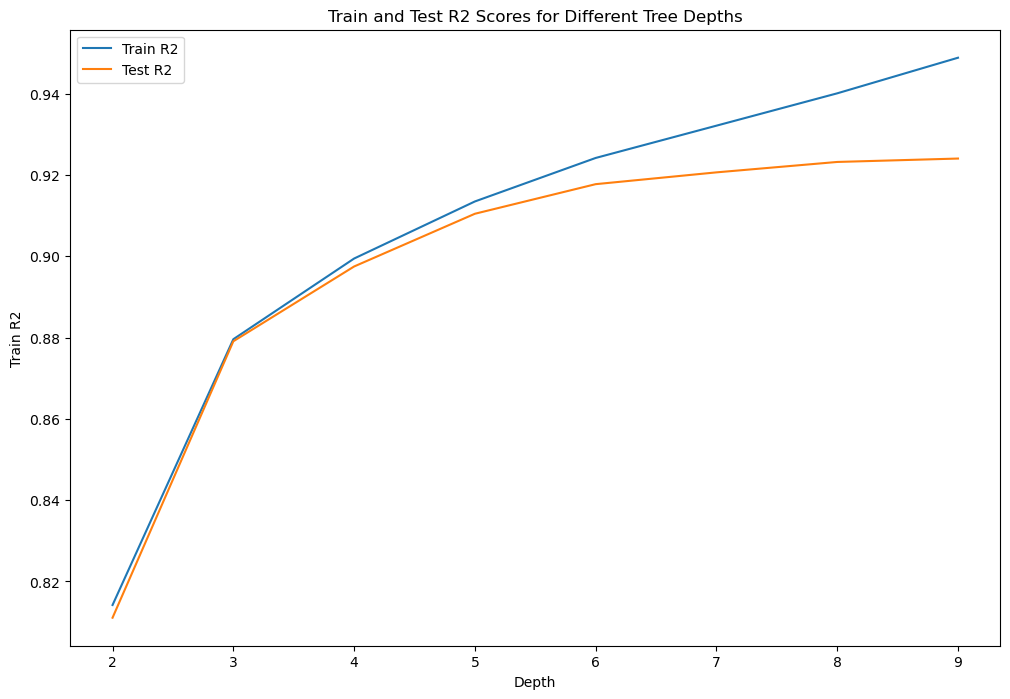

In [2]:
# decision_tree_regressor_with_cv.py
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Loop through depths from 2 to 9 and store the results
depth_results = []

for depth in range(2, 10):
    # Initialize and fit the Decision Tree Regressor model
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Depth {depth} - Cross-Validation R2 Scores: {cv_scores}")
    print(f"Depth {depth} - Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    depth_results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })

# Convert results to DataFrame for better visualization
depth_results_df = pd.DataFrame(depth_results)

# Display results
print("Decision Tree Regressor Results for Different Depths:")
print(depth_results_df)

# Plot results
plt.figure(figsize=(12, 8))
sns.lineplot(data=depth_results_df, x='Depth', y='Train R2', label='Train R2')
sns.lineplot(data=depth_results_df, x='Depth', y='Test R2', label='Test R2')
plt.title('Train and Test R2 Scores for Different Tree Depths')
plt.xlabel


## The Decision Tree Regressor's performance improves with increased depth, with Cross-Validation R² Scores rising from 0.813 at depth 2 to 0.923 at depth 8, then slightly stabilizing at depth 9 with 0.923. Training and testing R² scores indicate better fitting as depth increases, with train R² moving from 0.814 to 0.949 and test R² from 0.811 to 0.924. The model achieves the best balance of accuracy and error at depths 8 and 9, with train and test MSEs showing decreasing trends, indicating reduced errors as model complexity increases.








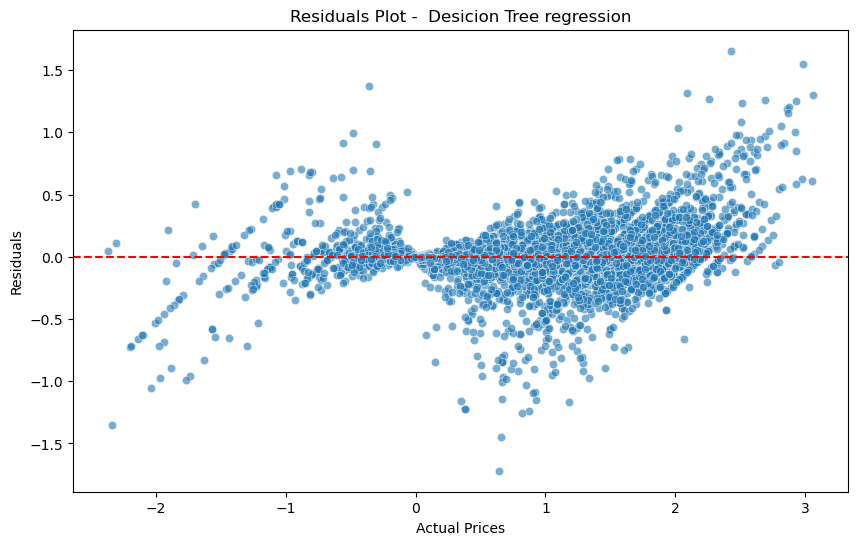

In [4]:


#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  Desicion Tree regression')
plt.show()


## The residuals plot for the KNN model shows signs of heteroscedasticity, with residuals spreading more as the predicted values increase, indicating non-uniform errors. The non-random pattern of residuals suggests the model may not be adequately capturing the underlying data relationships. Overall, the model struggles to accurately predict higher values, indicating potential for improvement or the need for a different model.